**Taking ideas from multiple notebooks I thought of creating a well structured directory of individual classes and their respective mjd vs flux plot which can be used as an easy input for CNNs and other multiclass image classification methods.
There is no feature engineering done on this as this is just a referrence code and my approach could also be wrong. So please hit me up with your suggestions
You should have a directory structure similar as the image below**

**After reffering a few kernels, I edited one of the functions from a notebook (I apologise since I do not remember the exact author or the notebook to give credits here. So I thank the entire community).**

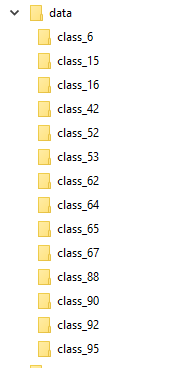

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#read csv
import os

In [ ]:
training = pd.read_csv('../input/PLAsTiCC-2018/training_set.csv')
meta_training = pd.read_csv("../input/PLAsTiCC-2018/training_set_metadata.csv")

In [ ]:
merged = training.merge(meta_training, on = "object_id")

In [ ]:
#saving unique object ids, passbands and targets can be of great use, one of the example shown in the below funct

unique_sources = merged.object_id.unique()
unique_passbands = merged.passband.unique()
unique_target = merged.target.unique()

In [ ]:
#we may need to arrange the 'mjd' column in ascending format, here I have assumed it already is. This is just a helper function.

def plot(n):
    obj_data = merged[merged.object_id == n]
    img_name = list(merged.target[merged.object_id == n])
    img_name = img_name[1]
    dir = os.path.join("data","class_{}".format(img_name)) #'data' is specific to my local directory  
    if not os.path.exists(dir):
        os.mkdir(dir)
    window_objdata = obj_data[(obj_data.mjd > 60100) & (obj_data.mjd<60300)]
    fig = plt.figure(figsize=(15,8))
    for passband in unique_passbands:
        specific_pb = window_objdata[window_objdata.passband == passband]
        plt.plot(specific_pb.mjd, specific_pb.flux, label = passband)
    plt.xlabel("MJD (in days from November 17, 1858)", fontsize = 15)
    plt.ylabel("Flux", fontsize = 15)
    plt.title(n)
    plt.legend()
    plt.savefig('data/class_{}/{}_img_{}'.format(img_name, img_name, n))

In [ ]:
"""for i in unique_sources:
    plot(i)"""
#plot(130762946) #***test for one unique object id.

#also, while saving we may want to crop the plot so that only plot lines are shown without axis values and legends since we do not want to feed unnecessary information to our img classifier.